# 1. CLEANING THE DATA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/dataframe_20k_290623.csv').drop(columns=['Unnamed: 0'])

In [5]:
# Getting to know the dataframe
df.head()

,locality,type of property,subtype of property,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP


In [6]:
# Rename the columns to be consistent in naming convention
df.rename(columns = {'type of property':'property_type', 'subtype of property':'property_subtype'}, inplace = True)
df.head()

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19974 non-null  object 
 1   property_type     19974 non-null  object 
 2   property_subtype  19974 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           18077 non-null  object 
 7   furnished         9815 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      18209 non-null  object 
 14  number_facades    16438 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16589 non-null  object

In [8]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19974 non-null  object 
 1   property_type     19974 non-null  object 
 2   property_subtype  19974 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           18077 non-null  object 
 7   furnished         9815 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      18209 non-null  object 
 14  number_facades    16438 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16589 non-null  object

In [9]:
# Write a function to show all the interesting values of a column
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

In [10]:
# write function to create a graph for categorical values
def create_cat_plot(df,column, angle):
    sns.barplot(x=column, y="price", data=df)
    # Set labels and title
    plt.xlabel(f"{column}")
    plt.ylabel("Price (in euro)")
    plt.title(f"{column} vs. Price")
    plt.xticks(rotation=angle)
    # Show the plot
    plt.show()

In [11]:
# write function to create a graph for numerical values
def create_num_plot(df, column):
    sns.scatterplot(x=column, y='price', data=df)
    plt.xlabel(f"{column}")
    plt.ylabel("Price (in euro)")
    plt.title(f"{column} vs. Price")
    # Show the plot
    plt.show()

In [12]:
# Write function to remove outlyers
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data


In [13]:
# Remove the rows that have all NaN values
df = df.dropna(how='all')

In [14]:
df.head()

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP


### 0. Price

In [15]:
# If we dont have a price - Delete the rows - not useable to predict pricing!
# This will be what we will need to predict
df['price'].info()
df.price.info()

<class 'pandas.core.series.Series'>
Index: 19974 entries, 0 to 19979
Series name: price
Non-Null Count  Dtype  
--------------  -----  
19499 non-null  float64
dtypes: float64(1)
memory usage: 312.1 KB
<class 'pandas.core.series.Series'>
Index: 19974 entries, 0 to 19979
Series name: price
Non-Null Count  Dtype  
--------------  -----  
19499 non-null  float64
dtypes: float64(1)
memory usage: 312.1 KB


In [16]:
# We have 475 rows with NaN as price - 2.38% of the total
analyze_column(df, 'price')

Analysis for column 'price':
Number of NaN values: 475
Number of unique values: 1624
Percentage of NaN values: 2.38%
Percentage of unique values: 8.13%
Unique values: [429500. 599000.  20000. ... 381500. 351000. 176000.]


In [17]:
df[df['price'].isna()]
# Most values are not Filled in (NaN) so I decide to drop all of these 475 rows

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
47,Roeselare,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
90,Evere,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
181,Balen,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
182,HERSELT,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
183,WITGOOR,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18901,Mons,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
19186,Borgloon,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
19537,Borgloon,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
19718,Dessel,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN


In [18]:
df = df.dropna(subset=['price'])

In [19]:
df[df['price'].isna()]
# ALL NaN Values are dropped

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19499 entries, 0 to 19979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19499 non-null  object 
 1   property_type     19499 non-null  object 
 2   property_subtype  19499 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           17602 non-null  object 
 7   furnished         9756 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      17734 non-null  object 
 14  number_facades    15963 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16114 non-null  object 
dty

In [21]:
# Resetting index to have nice looking dataframe
df.reset_index(inplace=True, drop=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19499 entries, 0 to 19498
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19499 non-null  object 
 1   property_type     19499 non-null  object 
 2   property_subtype  19499 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           17602 non-null  object 
 7   furnished         9756 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      17734 non-null  object 
 14  number_facades    15963 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16114 non-null  object

<Axes: xlabel='price', ylabel='Count'>

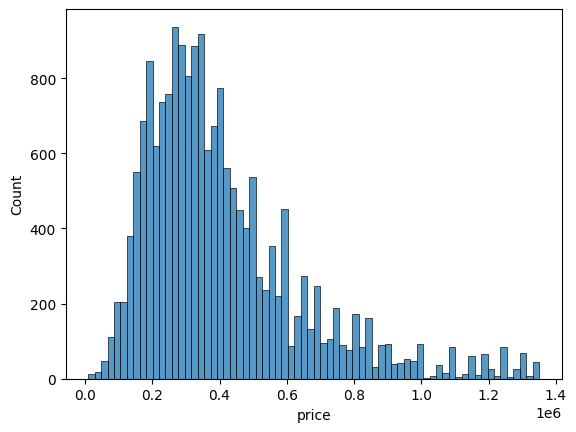

In [23]:
# convert to integers
df['price'] = pd.to_numeric(df['price'])
df_price_outlyers = df[df['price'] <= 1350000]
sns.histplot(df_price_outlyers, x='price')

<Axes: xlabel='price', ylabel='Count'>

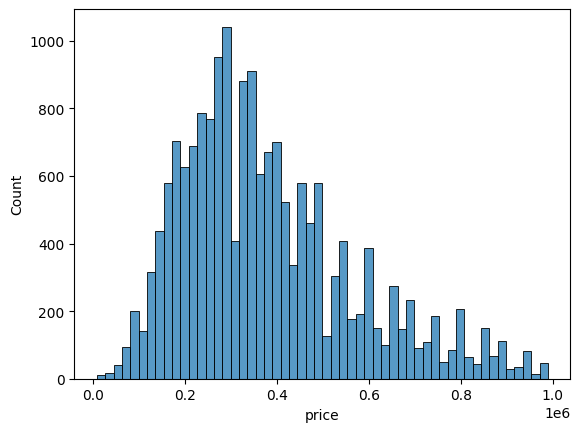

In [24]:
# need to filter out the outlyers
df = remove_outliers_iqr(df, 'price')
sns.histplot(x=df['price'])


### 1. Locality

In [143]:
analyze_column(df, 'locality')

Analysis for column 'locality':
Number of NaN values: 0
Number of unique values: 1620
Percentage of NaN values: 0.00%
Percentage of unique values: 16.23%
Unique values: ['Ham' 'Putte' 'IVOZ-RAMET' ... 'Havré' 'Geraardsbergen Ophasselt'
 'Sint-Martens-Latem']


In [26]:
df['locality'].info()

<class 'pandas.core.series.Series'>
Index: 17926 entries, 0 to 19498
Series name: locality
Non-Null Count  Dtype 
--------------  ----- 
17926 non-null  object
dtypes: object(1)
memory usage: 280.1+ KB


In [27]:
list_cities = df['locality'].unique()

In [28]:
# USING OPENCAGE to get longitude and latitude
# from opencage.geocoder import OpenCageGeocode
# key = "8adf7c226ce340589f05518e1cb51450"
# geocoder = OpenCageGeocode(key)

# latitudes = []
# longitudes = []

# for address in list_cities:
# 	result = geocoder.geocode(address, no_annotations="1")

# 	if result and len(result):
# 		longitude = result[0]['geometry']['lng']
# 		latitude = result[0]['geometry']['lat']
# 	else:
# 		longitude = "N/A"
# 		latitude = "N/A"

# 	with open('data/longlat.csv', 'a') as f:
# 		f.write(address)
# 		f.write(',')
# 		f.write(str(latitude)),
# 		f.write(',')
# 		f.write(str(longitude))
# 		f.write('\n')


In [29]:
# add columns w longitude latitude
df_ll = pd.read_csv('data/longlat.csv', on_bad_lines='skip')

In [30]:
df_ll

,locality,latitude,longitude
0,Ham,49.746322,3.073303
1,Putte,51.057082,4.631047
2,IVOZ-RAMET,50.582277,5.452349
3,Herstal,50.665041,5.629981
4,Liege,50.645094,5.573611
...,...,...,...
2396,Petigny,50.058382,4.532427
2397,Zwijndrecht Burcht,51.202805,4.341636
2398,Liege (Bressoux),50.641296,5.611144
2399,FONTAINE-VALMONT,50.320469,4.213974


In [31]:
# get all the long and lat values in the DF datafram
df = pd.merge(df, df_ll)
df['longitude'].replace('N/A', np.nan, inplace=True)
df['latitude'].replace('N/A', np.nan, inplace=True)

df = df.dropna(subset=['longitude', 'latitude'])

### 2. Property Type 

In [32]:
analyze_column(df, 'property_type')

Analysis for column 'property_type':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: ['HOUSE' 'APARTMENT']


In [33]:
# No NaN Values
df['property_type'].info()

<class 'pandas.core.series.Series'>
Index: 17712 entries, 0 to 17715
Series name: property_type
Non-Null Count  Dtype 
--------------  ----- 
17712 non-null  object
dtypes: object(1)
memory usage: 276.8+ KB


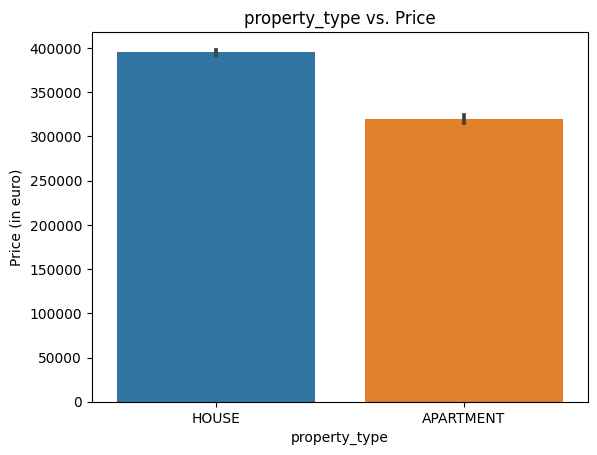

In [34]:
create_cat_plot(df, 'property_type', 0)

### 3. Property Subtype

In [158]:
analyze_column(df, 'property_subtype')

Analysis for column 'property_subtype':
Number of NaN values: 0
Number of unique values: 22
Percentage of NaN values: 0.00%
Percentage of unique values: 0.22%
Unique values: ['VILLA', 'HOUSE', 'DUPLEX', 'APARTMENT', 'APARTMENT_BLOCK', ..., 'TRIPLEX', 'LOFT', 'FARMHOUSE', 'OTHER_PROPERTY', 'KOT']
Length: 22
Categories (22, object): ['CHALET' < 'FLAT_STUDIO' < 'KOT' < 'SERVICE_FLAT' ... 'MANOR_HOUSE' < 'MANSION' < 'VILLA' < 'EXCEPTIONAL_PROPERTY']


In [36]:
df['property_subtype'].info()

<class 'pandas.core.series.Series'>
Index: 17712 entries, 0 to 17715
Series name: property_subtype
Non-Null Count  Dtype 
--------------  ----- 
17712 non-null  object
dtypes: object(1)
memory usage: 276.8+ KB


<Axes: xlabel='property_subtype', ylabel='Count'>

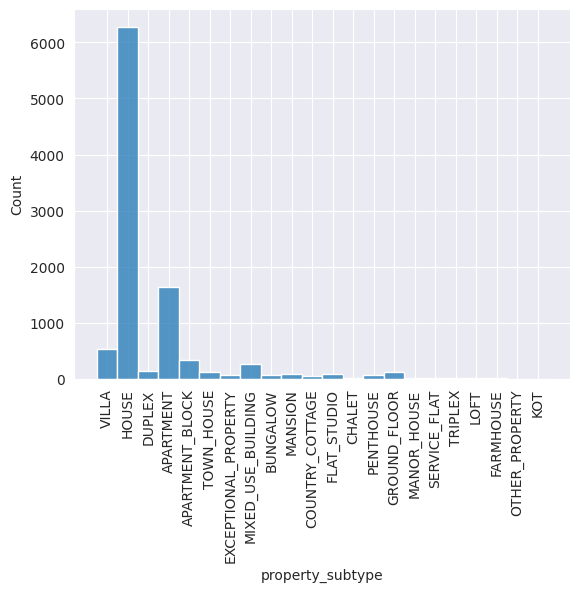

In [156]:
plt.xticks(rotation=90)
sns.histplot(df, x='property_subtype')

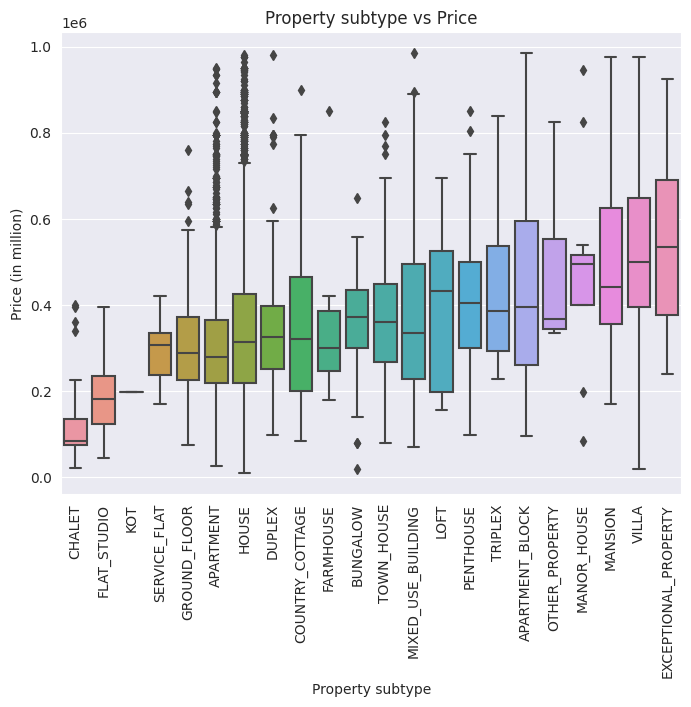

In [157]:
mean_prices = df.groupby('property_subtype')['price'].mean().sort_values(ascending=True)
sorted_categories = mean_prices.index.tolist()
df['property_subtype'] = pd.Categorical(df['property_subtype'], categories=sorted_categories, ordered=True)

fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'property_subtype', y = 'price',  data = df,ax=ax)
plt.title('Property subtype vs Price')
plt.xlabel('Property subtype')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

### 4. Number of Rooms

In [39]:
analyze_column(df, 'number_rooms')

Analysis for column 'number_rooms':
Number of NaN values: 0
Number of unique values: 22
Percentage of NaN values: 0.00%
Percentage of unique values: 0.12%
Unique values: [ 4.  3. 10.  5.  2.  6.  7.  8.  1. 13.  0.  9. 16. 12. 11. 18. 60. 17.
 25. 15. 21. 46.]


In [40]:
df['number_rooms'].info()

<class 'pandas.core.series.Series'>
Index: 17712 entries, 0 to 17715
Series name: number_rooms
Non-Null Count  Dtype  
--------------  -----  
17712 non-null  float64
dtypes: float64(1)
memory usage: 276.8 KB


<Axes: xlabel='number_rooms'>

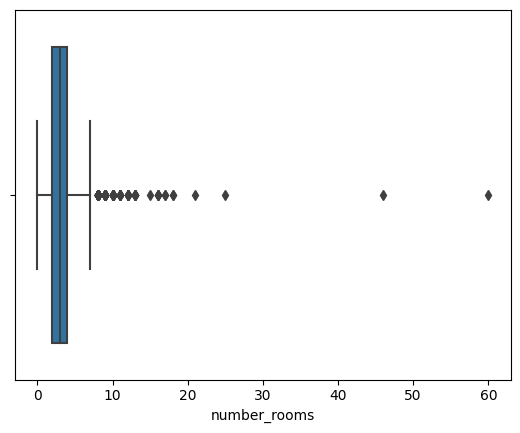

In [41]:
sns.boxplot(x=df['number_rooms'])

<Axes: xlabel='number_rooms', ylabel='Count'>

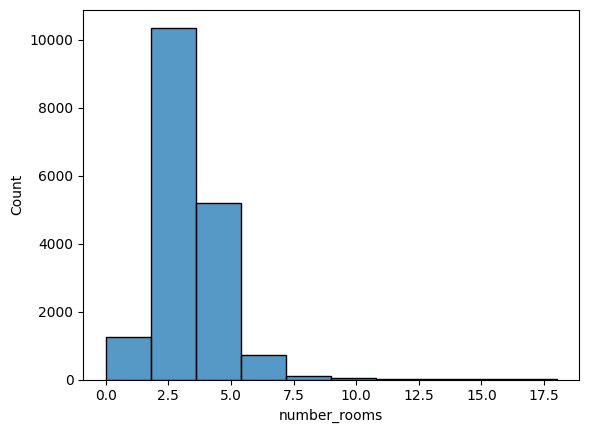

In [42]:
df_num_rooms = df[df['number_rooms'] <= 20]

sns.histplot(df_num_rooms, x='number_rooms', bins = 10)
# Good metric would be to use num_rooms up to 20

<Axes: xlabel='number_rooms'>

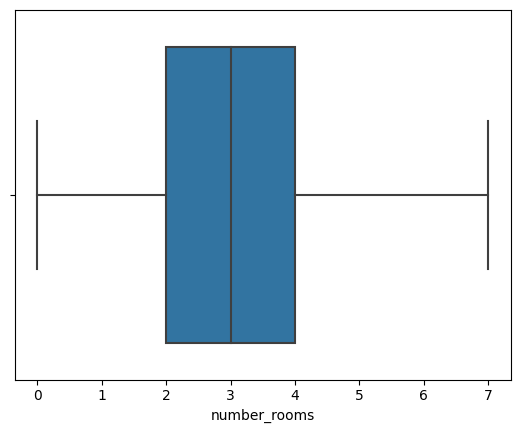

In [43]:
# Need to remove outlyers to get good normal distribution (using IQR method)
df = remove_outliers_iqr(df, 'number_rooms')
sns.boxplot(x=df['number_rooms'])

Text(0.5, 1.0, 'Histogram - number of rooms')

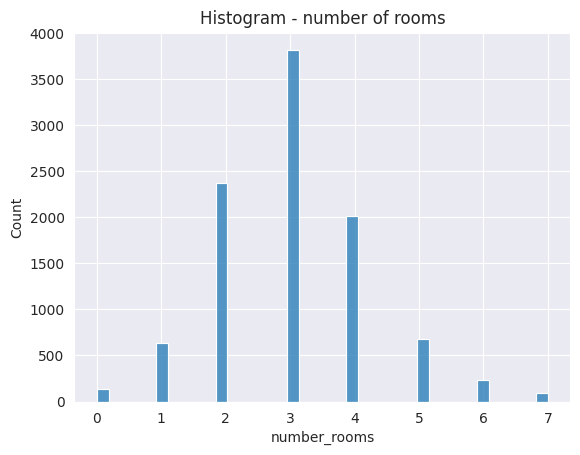

In [160]:
sns.histplot(x=df['number_rooms'])
plt.title('Histogram - number of rooms')

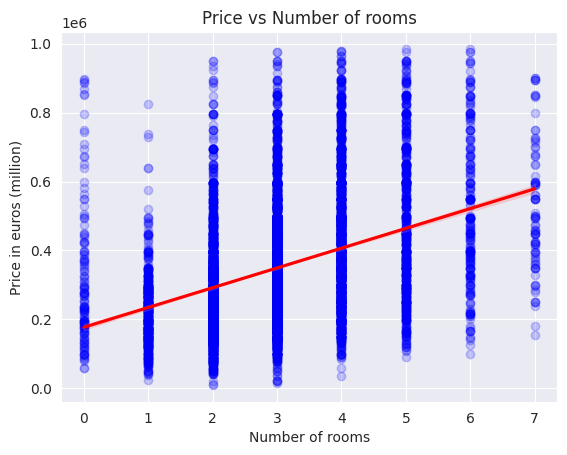

In [161]:
sns.regplot(df, x='number_rooms', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Number of rooms')
plt.ylabel('Price in euros (million)')
plt.xlabel('Number of rooms')
sns.set_style('darkgrid')

### 5. Living Area

In [45]:
analyze_column(df, 'living_area')

Analysis for column 'living_area':
Number of NaN values: 963
Number of unique values: 541
Percentage of NaN values: 5.49%
Percentage of unique values: 3.09%
Unique values: [2.1500e+02 1.9700e+02 1.9200e+02 1.9500e+02 1.6500e+02 3.1900e+02
 3.5100e+02 1.0400e+02 2.7300e+02 1.6700e+02 2.3200e+02 2.0300e+02
 1.7200e+02 2.6000e+02 2.6300e+02 1.1800e+02 1.4100e+02 2.6100e+02
 2.7000e+02 9.7000e+01 1.5900e+02 1.7500e+02 1.0300e+02 1.7000e+02
 1.8700e+02 2.2100e+02 2.8700e+02 8.5000e+01 1.5300e+02        nan
 1.5000e+02 2.1100e+02 2.2000e+02 1.3000e+02 1.0000e+02 1.8200e+02
 1.2000e+02 8.1000e+01 2.3100e+02 1.2400e+02 1.6400e+02 3.0100e+02
 1.2100e+02 2.0100e+02 1.3600e+02 1.4000e+02 1.3700e+02 1.0500e+02
 6.8000e+01 1.6100e+02 1.3500e+02 1.1000e+02 9.0000e+01 2.0400e+02
 1.4500e+02 5.9000e+01 7.5000e+01 1.1500e+02 1.7100e+02 1.1200e+02
 1.2700e+02 1.7900e+02 6.2000e+01 2.2200e+02 2.4200e+02 1.6900e+02
 2.2300e+02 4.2300e+02 1.2300e+02 6.0000e+01 1.9100e+02 2.3900e+02
 2.9500e+02 5.5000e+01 2

In [46]:
analyze_column(df, 'living_area')

Analysis for column 'living_area':
Number of NaN values: 963
Number of unique values: 541
Percentage of NaN values: 5.49%
Percentage of unique values: 3.09%
Unique values: [2.1500e+02 1.9700e+02 1.9200e+02 1.9500e+02 1.6500e+02 3.1900e+02
 3.5100e+02 1.0400e+02 2.7300e+02 1.6700e+02 2.3200e+02 2.0300e+02
 1.7200e+02 2.6000e+02 2.6300e+02 1.1800e+02 1.4100e+02 2.6100e+02
 2.7000e+02 9.7000e+01 1.5900e+02 1.7500e+02 1.0300e+02 1.7000e+02
 1.8700e+02 2.2100e+02 2.8700e+02 8.5000e+01 1.5300e+02        nan
 1.5000e+02 2.1100e+02 2.2000e+02 1.3000e+02 1.0000e+02 1.8200e+02
 1.2000e+02 8.1000e+01 2.3100e+02 1.2400e+02 1.6400e+02 3.0100e+02
 1.2100e+02 2.0100e+02 1.3600e+02 1.4000e+02 1.3700e+02 1.0500e+02
 6.8000e+01 1.6100e+02 1.3500e+02 1.1000e+02 9.0000e+01 2.0400e+02
 1.4500e+02 5.9000e+01 7.5000e+01 1.1500e+02 1.7100e+02 1.1200e+02
 1.2700e+02 1.7900e+02 6.2000e+01 2.2200e+02 2.4200e+02 1.6900e+02
 2.2300e+02 4.2300e+02 1.2300e+02 6.0000e+01 1.9100e+02 2.3900e+02
 2.9500e+02 5.5000e+01 2

In [47]:
# Theres quite a bit of Nan Values (5.41%)- checking these out 
#(we could backfill the NaN values with the mean of the Living_ area per property_subtype)
df[df['living_area'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude
43,Putte,HOUSE,HOUSE,649000.0,3.0,NaN,HYPER_EQUIPPED,NaN,1.0,True,52.0,True,512.0,512,4,True,AS_NEW,51.057082,4.631047
50,IVOZ-RAMET,HOUSE,HOUSE,155000.0,3.0,NaN,NaN,NaN,-1.0,True,13.0,NaN,NaN,70,2,NaN,TO_RENOVATE,50.582277,5.452349
51,IVOZ-RAMET,HOUSE,HOUSE,155000.0,3.0,NaN,NaN,NaN,-1.0,True,13.0,NaN,NaN,70,2,NaN,TO_RENOVATE,50.582277,5.452349
55,Herstal,HOUSE,APARTMENT_BLOCK,425000.0,5.0,NaN,0,NaN,NaN,True,NaN,NaN,NaN,0,2,NaN,GOOD,50.665041,5.629981
97,Herstal,HOUSE,HOUSE,245000.0,4.0,NaN,0,NaN,-1.0,True,19.0,True,500.0,916,3,NaN,TO_BE_DONE_UP,50.665041,5.629981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17638,Mormont,HOUSE,HOUSE,220000.0,4.0,NaN,INSTALLED,NaN,NaN,NaN,NaN,NaN,NaN,2170,4,NaN,GOOD,50.326333,5.592465
17639,Nederename,HOUSE,HOUSE,445000.0,5.0,NaN,INSTALLED,NaN,NaN,True,NaN,NaN,NaN,551,2,True,GOOD,50.867838,3.632287
17650,St-Kruis,HOUSE,HOUSE,380000.0,3.0,NaN,INSTALLED,False,NaN,NaN,NaN,NaN,NaN,454,3,NaN,AS_NEW,51.214202,3.250651
17679,SEPTON,HOUSE,HOUSE,450000.0,3.0,NaN,NaN,NaN,-1.0,True,40.0,NaN,NaN,1639,4,NaN,NaN,50.360101,5.437417


In [48]:
# backfill the NaN values with the mean of the Living_area per property_subtype
mean_living_area = df.groupby('property_subtype')['living_area'].transform('mean')
#  Transform function is used to calculate the mean living area for each property subtype.
mean_living_area

0        238.962138
1        183.258071
2        183.258071
3        183.258071
4        183.258071
            ...    
17711    183.258071
17712    183.258071
17713    183.258071
17714    183.258071
17715    183.258071
Name: living_area, Length: 17526, dtype: float64

In [49]:
mean_living_area = df.groupby('property_subtype')['living_area'].transform('mean')
filled_nan_living_area = df.groupby('property_subtype')['living_area'].fillna(round(mean_living_area))
df['living_area'] = filled_nan_living_area

In [50]:
df[df['living_area'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude


<Axes: xlabel='living_area', ylabel='Count'>

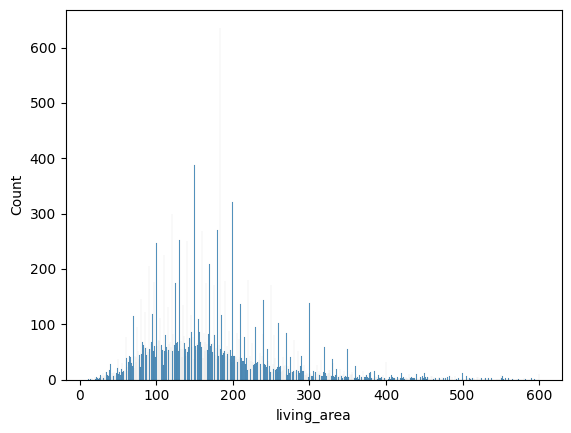

In [51]:
df_living_area = df[df['living_area'] <= 600]
sns.histplot(df_living_area, x='living_area', bins=1000)

<Axes: xlabel='living_area'>

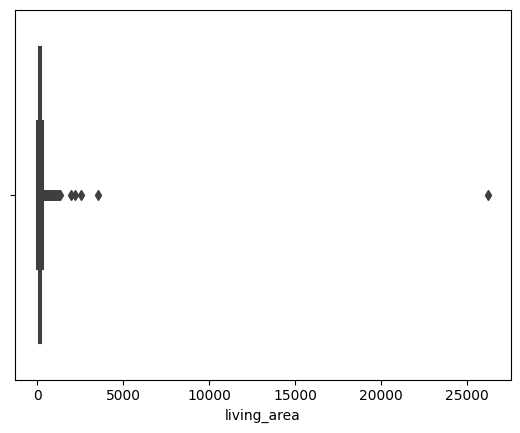

In [52]:
# Visualise and Remove the outlyers
sns.boxplot(x=df['living_area'])

<Axes: xlabel='living_area'>

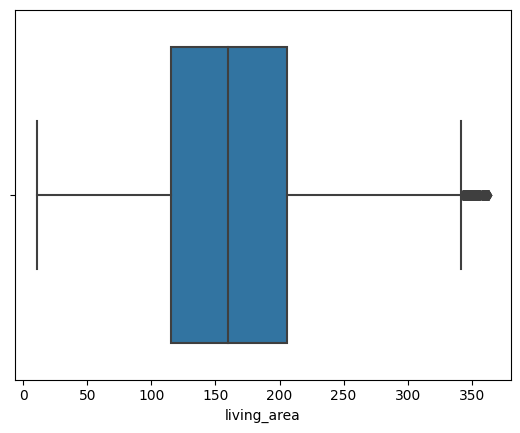

In [53]:
df = remove_outliers_iqr(df, 'living_area')
sns.boxplot(x=df['living_area'])

Text(0.5, 1.0, 'Histogram - Living Area')

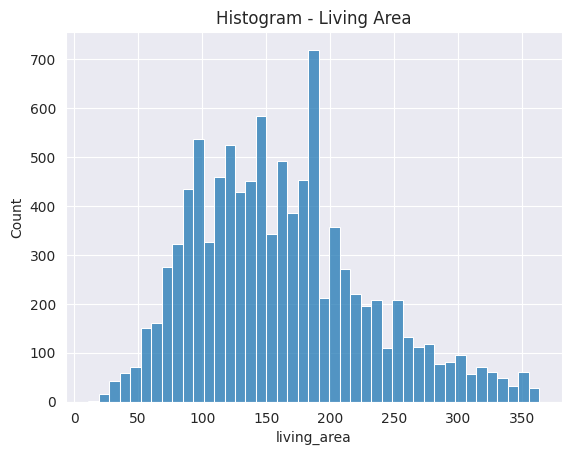

In [162]:
sns.histplot(x=df['living_area'])
plt.title('Histogram - Living Area')

### 6. Kitchen

In [55]:
df['kitchen'].unique()

array(['INSTALLED', 'HYPER_EQUIPPED', 'NOT_INSTALLED', '0',
       'SEMI_EQUIPPED', 'USA_HYPER_EQUIPPED', nan, 'USA_INSTALLED',
       'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED'], dtype=object)

In [56]:
df[df['kitchen'].isna()]
# TODO: We have a lot of NaN values - What to do with these?

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude
50,IVOZ-RAMET,HOUSE,HOUSE,155000.0,3.0,183.0,NaN,NaN,-1.0,True,13.0,NaN,NaN,70,2,NaN,TO_RENOVATE,50.582277,5.452349
51,IVOZ-RAMET,HOUSE,HOUSE,155000.0,3.0,183.0,NaN,NaN,-1.0,True,13.0,NaN,NaN,70,2,NaN,TO_RENOVATE,50.582277,5.452349
64,Herstal,HOUSE,APARTMENT_BLOCK,283000.0,3.0,164.0,NaN,NaN,NaN,True,NaN,NaN,NaN,0,2,False,TO_BE_DONE_UP,50.665041,5.629981
79,Herstal,HOUSE,APARTMENT_BLOCK,249000.0,7.0,232.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,779,2,NaN,NaN,50.665041,5.629981
93,Herstal,HOUSE,HOUSE,139500.0,3.0,90.0,NaN,False,NaN,NaN,NaN,True,30.0,66,2,False,TO_RENOVATE,50.665041,5.629981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679,SEPTON,HOUSE,HOUSE,450000.0,3.0,183.0,NaN,NaN,-1.0,True,40.0,NaN,NaN,1639,4,NaN,NaN,50.360101,5.437417
17685,Angre,HOUSE,HOUSE,49000.0,1.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916,4,NaN,TO_RENOVATE,50.366983,3.695451
17694,Haut-fays,HOUSE,HOUSE,239000.0,7.0,158.0,NaN,False,NaN,True,18.0,True,166.0,266,4,NaN,GOOD,50.001171,5.016915
17712,NEERHEYLISSEM,HOUSE,HOUSE,310000.0,3.0,153.0,NaN,NaN,1.0,NaN,NaN,True,1700.0,1747,4,NaN,TO_RENOVATE,50.756768,4.989015


In [57]:
df[df['kitchen'] == '0']
# need to change this '0' to NOT_DEFINED - NOT CERTAIN but probably when filling out the survey of the listing the operator filled out 0 in a lot of cases
# To not assume it's installed or not installed we will make a new category - NOT_DEFINED
df['kitchen'].replace('0', 'NOT_DEFINED', inplace=True)
df[df['kitchen'] == 'NOT_DEFINED']

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude
14,Ham,APARTMENT,DUPLEX,245000.0,2.0,104.0,NOT_DEFINED,False,NaN,NaN,NaN,NaN,NaN,NaN,3,False,GOOD,49.746322,3.073303
29,Putte,HOUSE,HOUSE,589000.0,4.0,261.0,NOT_DEFINED,NaN,NaN,NaN,NaN,NaN,NaN,523,NaN,False,NaN,51.057082,4.631047
33,Putte,HOUSE,HOUSE,393000.0,3.0,159.0,NOT_DEFINED,NaN,1.0,True,20.0,True,300.0,712,4,False,NaN,51.057082,4.631047
41,Putte,APARTMENT,APARTMENT,285000.0,2.0,85.0,NOT_DEFINED,False,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,AS_NEW,51.057082,4.631047
54,Herstal,HOUSE,HOUSE,225000.0,2.0,81.0,NOT_DEFINED,NaN,-1.0,True,9.0,True,104.0,225,3,NaN,JUST_RENOVATED,50.665041,5.629981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17690,Péruwelz Bon-Secours,APARTMENT,APARTMENT,199000.0,2.0,96.0,NOT_DEFINED,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,3,False,AS_NEW,50.497618,3.607483
17699,VELAINES,HOUSE,HOUSE,450000.0,3.0,331.0,NOT_DEFINED,NaN,-1.0,True,NaN,NaN,NaN,1740,4,NaN,NaN,48.703359,5.300107
17702,Zwijndrecht Burcht,HOUSE,HOUSE,170000.0,2.0,140.0,NOT_DEFINED,NaN,NaN,NaN,NaN,NaN,NaN,190,2,NaN,TO_RENOVATE,51.202805,4.341636
17703,Liege (Bressoux),HOUSE,MIXED_USE_BUILDING,171000.0,4.0,166.0,NOT_DEFINED,NaN,NaN,NaN,NaN,NaN,NaN,0,3,False,GOOD,50.641296,5.611144


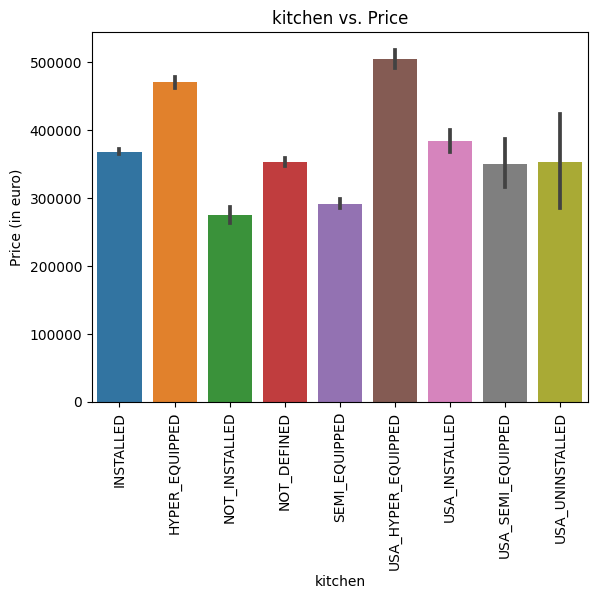

In [58]:
create_cat_plot(df, 'kitchen', 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'INSTALLED'),
  Text(1, 0, 'HYPER_EQUIPPED'),
  Text(2, 0, 'NOT_INSTALLED'),
  Text(3, 0, 'NOT_DEFINED'),
  Text(4, 0, 'SEMI_EQUIPPED'),
  Text(5, 0, 'USA_HYPER_EQUIPPED'),
  Text(6, 0, 'USA_INSTALLED'),
  Text(7, 0, 'USA_SEMI_EQUIPPED'),
  Text(8, 0, 'USA_UNINSTALLED')])

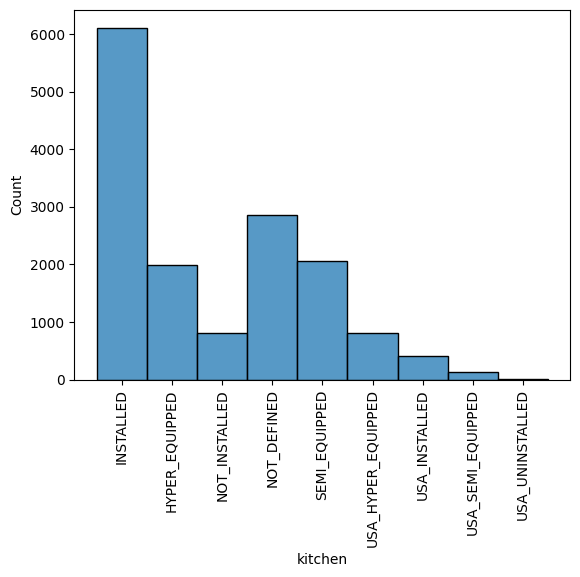

In [59]:
sns.histplot(df, x='kitchen')
plt.xticks(rotation=90)

In [60]:
df['kitchen'].describe()

count         15184
unique            9
top       INSTALLED
freq           6113
Name: kitchen, dtype: object

In [61]:
df[df['kitchen'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude
50,IVOZ-RAMET,HOUSE,HOUSE,155000.0,3.0,183.0,NaN,NaN,-1.0,True,13.0,NaN,NaN,70,2,NaN,TO_RENOVATE,50.582277,5.452349
51,IVOZ-RAMET,HOUSE,HOUSE,155000.0,3.0,183.0,NaN,NaN,-1.0,True,13.0,NaN,NaN,70,2,NaN,TO_RENOVATE,50.582277,5.452349
64,Herstal,HOUSE,APARTMENT_BLOCK,283000.0,3.0,164.0,NaN,NaN,NaN,True,NaN,NaN,NaN,0,2,False,TO_BE_DONE_UP,50.665041,5.629981
79,Herstal,HOUSE,APARTMENT_BLOCK,249000.0,7.0,232.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,779,2,NaN,NaN,50.665041,5.629981
93,Herstal,HOUSE,HOUSE,139500.0,3.0,90.0,NaN,False,NaN,NaN,NaN,True,30.0,66,2,False,TO_RENOVATE,50.665041,5.629981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679,SEPTON,HOUSE,HOUSE,450000.0,3.0,183.0,NaN,NaN,-1.0,True,40.0,NaN,NaN,1639,4,NaN,NaN,50.360101,5.437417
17685,Angre,HOUSE,HOUSE,49000.0,1.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916,4,NaN,TO_RENOVATE,50.366983,3.695451
17694,Haut-fays,HOUSE,HOUSE,239000.0,7.0,158.0,NaN,False,NaN,True,18.0,True,166.0,266,4,NaN,GOOD,50.001171,5.016915
17712,NEERHEYLISSEM,HOUSE,HOUSE,310000.0,3.0,153.0,NaN,NaN,1.0,NaN,NaN,True,1700.0,1747,4,NaN,TO_RENOVATE,50.756768,4.989015


In [62]:
df['kitchen'].replace(np.nan, 'NOT_DEFINED', inplace=True)

In [63]:
df[df['kitchen'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude


Text(0.5, 1.0, 'Type of kitchen - counts')

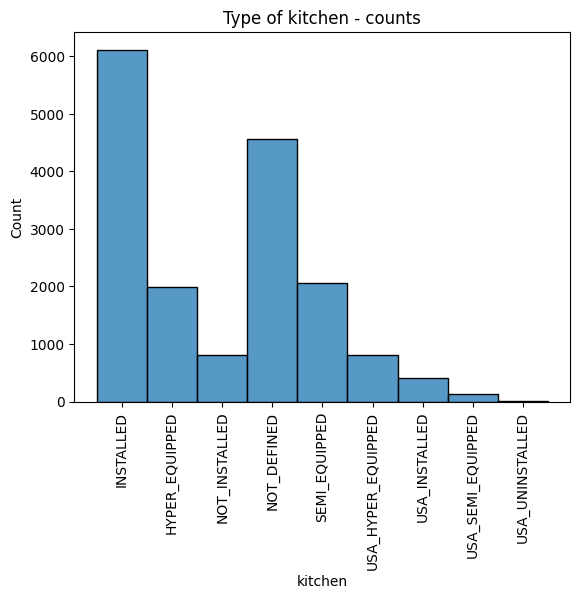

In [64]:
sns.histplot(df, x='kitchen')
plt.xticks(rotation=90)
plt.title('Type of kitchen - counts')

### 7. Furnished

In [65]:
analyze_column(df, 'furnished')

Analysis for column 'furnished':
Number of NaN values: 8627
Number of unique values: 2
Percentage of NaN values: 51.10%
Percentage of unique values: 0.01%
Unique values: [nan False True]


In [66]:
# A lot of NaN - can be assume that this NaN mean it is not furnished (I think so - especially Belgium not a lot of houses are sold furnished)
# replacing the NaN values with False
df['furnished'] = df['furnished'].replace(np.nan, False)

# replace the False values with 0 and the True values with 1
df['furnished'].replace(False, 0, inplace=True)
df['furnished'].replace(True, 1, inplace=True)

In [67]:
df[df['furnished'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude


In [68]:
df['furnished'].unique()

array([0, 1])

Text(0, 0.5, 'count')

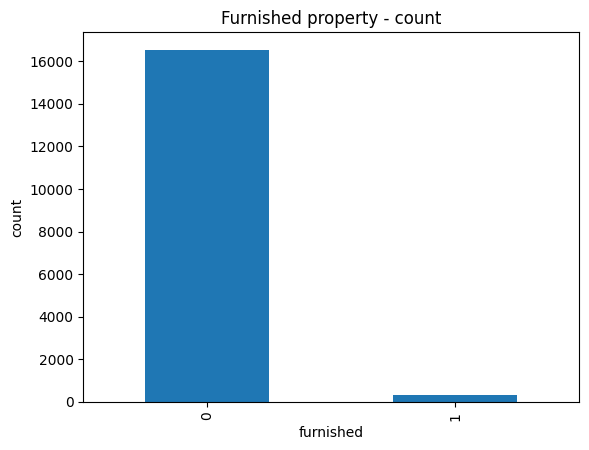

In [69]:
df['furnished'].value_counts().plot(kind='bar')
plt.title('Furnished property - count')
plt.ylabel('count')

### 8. Fireplace

In [70]:
analyze_column(df, 'fireplace')

Analysis for column 'fireplace':
Number of NaN values: 11510
Number of unique values: 6
Percentage of NaN values: 68.18%
Percentage of unique values: 0.04%
Unique values: [-1. nan  1.  2.  3.  4. 10.]


In [71]:
df['fireplace'].unique()

array([-1., nan,  1.,  2.,  3.,  4., 10.])

In [72]:
# ASSUMPTION 1: -1 means there is no fireplace
df[df['fireplace'] == -1]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,0,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD,49.746322,3.073303
6,Ham,HOUSE,HOUSE,295000.0,3.0,165.0,INSTALLED,0,-1.0,NaN,NaN,True,NaN,457,3,NaN,JUST_RENOVATED,49.746322,3.073303
7,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,0,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD,49.746322,3.073303
10,Ham,HOUSE,VILLA,549000.0,5.0,351.0,INSTALLED,0,-1.0,NaN,NaN,True,NaN,0,4,NaN,GOOD,49.746322,3.073303
18,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,0,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED,51.057082,4.631047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679,SEPTON,HOUSE,HOUSE,450000.0,3.0,183.0,NOT_DEFINED,0,-1.0,True,40.0,NaN,NaN,1639,4,NaN,NaN,50.360101,5.437417
17699,VELAINES,HOUSE,HOUSE,450000.0,3.0,331.0,NOT_DEFINED,0,-1.0,True,NaN,NaN,NaN,1740,4,NaN,NaN,48.703359,5.300107
17700,ANSEREMME,APARTMENT,APARTMENT,165000.0,4.0,130.0,SEMI_EQUIPPED,0,-1.0,NaN,NaN,NaN,NaN,UNKNOWN,4,NaN,TO_RENOVATE,50.237910,4.907923
17704,FONTAINE-VALMONT,HOUSE,HOUSE,175000.0,2.0,125.0,SEMI_EQUIPPED,0,-1.0,NaN,NaN,NaN,NaN,3940,2,NaN,JUST_RENOVATED,50.320469,4.213974


In [73]:
# Replace the -1 values with 0
df['fireplace'].replace(-1, 0, inplace=True)

In [74]:
# ASSUMPTION 2 : -1 means there is no fireplace
# Replace the NaN values with 0
df['fireplace'].replace(np.nan, 0, inplace=True)

In [75]:
df['fireplace'].unique()

array([ 0.,  1.,  2.,  3.,  4., 10.])

Text(0.5, 1.0, 'fireplace vs Price - per Region')

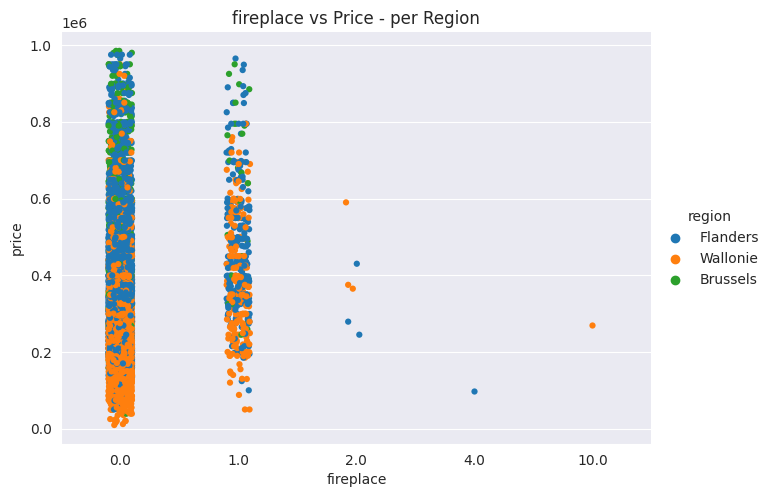

In [150]:
sns.catplot(data=df,x='fireplace',y='price',
               size=4.5,aspect=1.35, hue='region')
plt.title('fireplace vs Price - per Region')

In [77]:
df['fireplace'].unique()

array([ 0.,  1.,  2.,  3.,  4., 10.])

<Axes: xlabel='fireplace'>

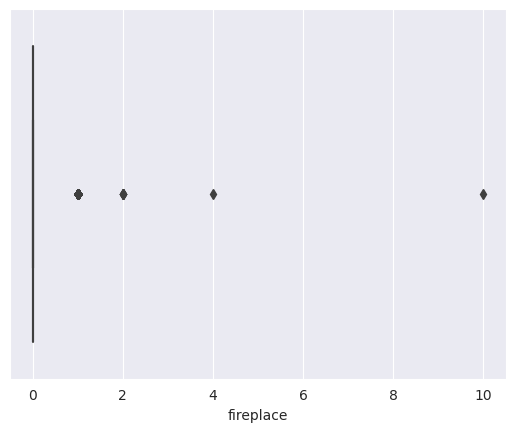

In [144]:
sns.boxplot(x =df['fireplace'])

In [152]:
# Remove outlyers (all 2 up to 10 - 8 entries)
df[df['fireplace'] >= 2]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude,region,province
664,Geraardsbergen,HOUSE,HOUSE,245000.0,3.0,183.0,INSTALLED,0,2.0,0,...,0,0.0,100.0,3.0,0,GOOD,50.771578,3.882729,Flanders,East Flanders
1844,Namur,HOUSE,VILLA,365000.0,2.0,120.0,SEMI_EQUIPPED,0,2.0,1,...,1,1.0,908.0,4.0,0,JUST_RENOVATED,50.466528,4.866189,Wallonie,Namur
3539,Ronse,HOUSE,HOUSE,99000.0,2.0,183.0,NOT_DEFINED,0,4.0,0,...,1,0.0,488.0,3.0,0,TO_BE_DONE_UP,50.752620,3.601448,Flanders,East Flanders
6701,Tubize,HOUSE,VILLA,375000.0,3.0,180.0,INSTALLED,0,2.0,1,...,1,180.0,395.0,4.0,0,AS_NEW,50.693020,4.204696,Wallonie,Walloon Brabant
8321,Enghien,HOUSE,HOUSE,590000.0,4.0,260.0,HYPER_EQUIPPED,0,2.0,1,...,1,1.0,0.0,2.0,0,AS_NEW,50.692820,4.038373,Wallonie,Hainaut
8445,Bilzen,HOUSE,HOUSE,279000.0,3.0,218.0,INSTALLED,0,2.0,0,...,1,1.0,500.0,4.0,0,AS_NEW,50.870779,5.518109,Flanders,Limburg
8787,RACHECOURT,HOUSE,HOUSE,269000.0,3.0,123.0,NOT_DEFINED,0,10.0,1,...,1,0.0,379.0,3.0,0,TO_RENOVATE,49.590313,5.724814,Wallonie,Luxembourg
9521,Rillaar,HOUSE,HOUSE,430000.0,3.0,194.0,NOT_DEFINED,0,2.0,0,...,1,0.0,517.0,4.0,0,JUST_RENOVATED,50.975741,4.892865,Flanders,Flemish Brabant


Text(0.5, 1.0, 'fireplace vs Price - per Region')

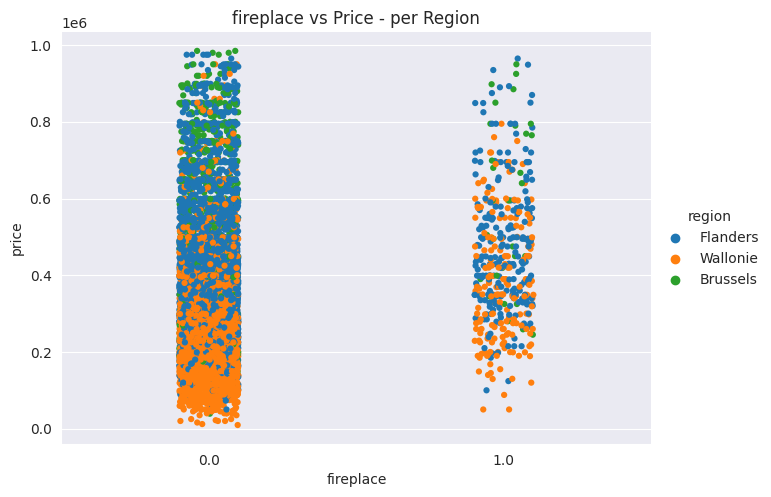

In [155]:
df = df[df['fireplace'] < 2]
sns.catplot(data=df,x='fireplace',y='price',
               size=4.5,aspect=1.35, hue='region')
plt.title('fireplace vs Price - per Region')

### 9. Terrace

In [79]:
analyze_column(df, 'terrace')
# Assumption that NaN values are 0 and True values are 1

Analysis for column 'terrace':
Number of NaN values: 5857
Number of unique values: 1
Percentage of NaN values: 34.69%
Percentage of unique values: 0.01%
Unique values: [nan True]


In [80]:
df.replace(np.nan, 0, inplace=True)
df.replace(True, 1, inplace=True)

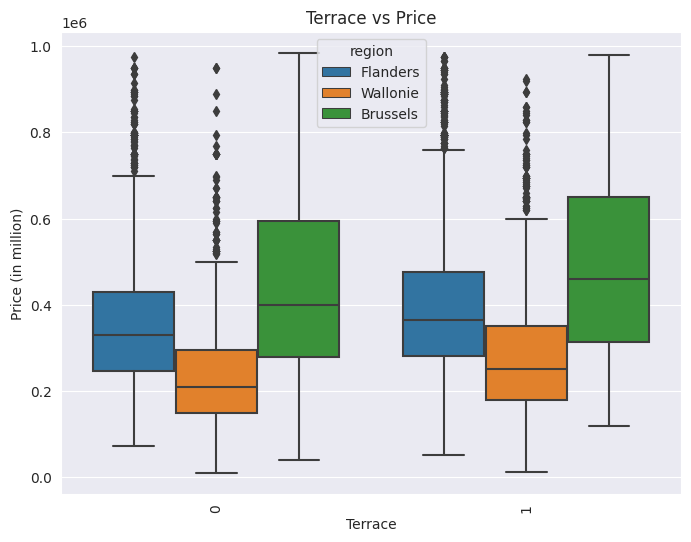

In [166]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x= 'terrace', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Terrace vs Price')
plt.xlabel('Terrace')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Terrace count')

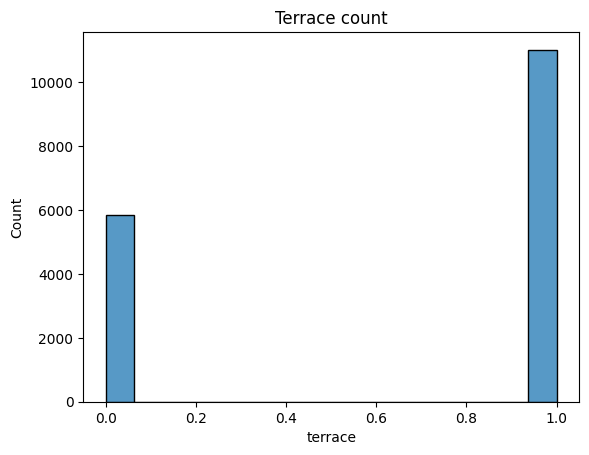

In [82]:
sns.histplot(df['terrace'])
plt.title('Terrace count')

### 10. Terrace Area

In [83]:
analyze_column(df, 'terrace_area')

Analysis for column 'terrace_area':
Number of NaN values: 0
Number of unique values: 157
Percentage of NaN values: 0.00%
Percentage of unique values: 0.93%
Unique values: [0.00e+00 2.00e+01 3.70e+01 3.00e+01 5.20e+01 3.50e+01 5.00e+00 1.30e+01
 1.20e+01 9.00e+00 8.00e+01 5.40e+01 5.30e+01 4.00e+01 2.50e+01 5.84e+02
 4.20e+01 3.40e+01 1.40e+01 1.10e+01 1.60e+01 1.80e+01 1.00e+01 2.90e+01
 6.00e+01 1.00e+00 2.40e+02 2.20e+01 4.80e+01 1.90e+01 3.90e+01 3.20e+01
 3.30e+01 3.26e+02 2.00e+00 6.50e+01 5.60e+01 2.70e+01 3.00e+00 5.50e+01
 8.00e+00 1.50e+01 7.00e+00 6.80e+01 2.40e+01 3.60e+01 7.00e+01 8.80e+01
 1.70e+01 4.50e+01 4.00e+00 5.00e+01 4.10e+01 4.30e+01 1.61e+02 8.10e+01
 2.80e+01 2.30e+01 1.20e+02 7.50e+01 1.96e+02 6.00e+00 4.40e+01 3.80e+01
 7.20e+01 5.70e+01 9.90e+01 1.00e+02 2.10e+01 1.08e+02 4.60e+01 5.10e+01
 3.10e+01 1.07e+02 1.82e+02 8.90e+01 9.80e+01 6.20e+01 8.50e+01 6.40e+01
 2.60e+01 1.12e+02 1.25e+02 2.00e+02 1.47e+02 1.23e+02 1.10e+02 9.20e+01
 4.34e+02 6.10e+01 8.40e+0

<Axes: xlabel='terrace_area'>

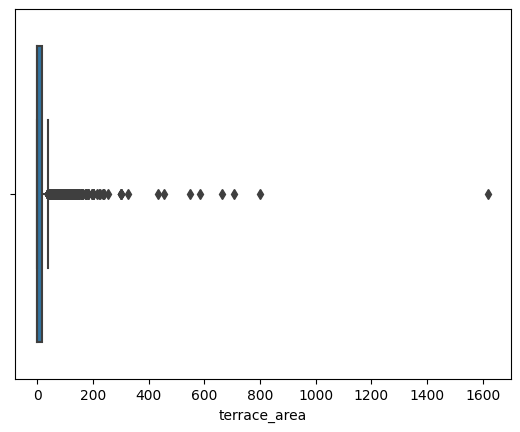

In [84]:
sns.boxplot(x=df['terrace_area'])

In [85]:
df.groupby('terrace')['terrace_area'].mean()

terrace
0     0.000000
1    16.583492
Name: terrace_area, dtype: float64

In [86]:
df[df['terrace_area'] == 0.0]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,0,0.0,0,0.0,1,0.0,1472,4,0,GOOD,49.746322,3.073303
1,Ham,HOUSE,HOUSE,399500.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,0.0,0,0.0,461,3,0,AS_NEW,49.746322,3.073303
2,Ham,HOUSE,HOUSE,381000.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,0.0,0,0.0,343,3,0,AS_NEW,49.746322,3.073303
3,Ham,HOUSE,HOUSE,393500.0,3.0,192.0,HYPER_EQUIPPED,0,0.0,0,0.0,0,0.0,392,3,0,AS_NEW,49.746322,3.073303
4,Ham,HOUSE,HOUSE,315000.0,3.0,197.0,NOT_INSTALLED,0,0.0,0,0.0,0,0.0,509,3,0,AS_NEW,49.746322,3.073303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,Havré,HOUSE,HOUSE,179000.0,3.0,138.0,INSTALLED,0,0.0,0,0.0,0,0.0,110,2,0,GOOD,50.460573,4.037512
17706,Havré,HOUSE,HOUSE,120000.0,2.0,90.0,SEMI_EQUIPPED,0,0.0,1,0.0,0,0.0,273,3,0,TO_BE_DONE_UP,50.460573,4.037512
17712,NEERHEYLISSEM,HOUSE,HOUSE,310000.0,3.0,153.0,NOT_DEFINED,0,1.0,0,0.0,1,1700.0,1747,4,0,TO_RENOVATE,50.756768,4.989015
17713,Sint-Martens-Latem,HOUSE,HOUSE,599000.0,4.0,199.0,HYPER_EQUIPPED,0,0.0,1,0.0,0,0.0,1104,4,False,TO_RENOVATE,51.020971,3.639755


<Axes: xlabel='terrace_area'>

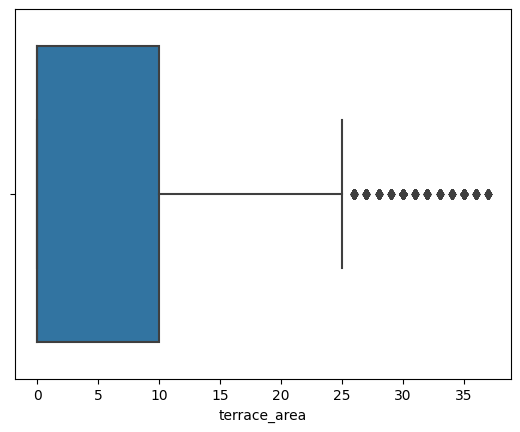

In [87]:
# need to remove the outlyers to get 'normal distribution'
df = remove_outliers_iqr(df, 'terrace_area')
sns.boxplot(x=df['terrace_area'])

/tmp/ipykernel_47655/2516338998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['terrace_area'])


<Axes: ylabel='Density'>

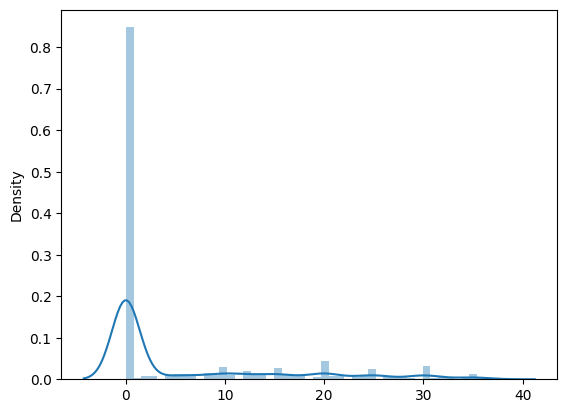

In [88]:
sns.distplot(x=df['terrace_area'])

### 11. Garden

In [90]:
analyze_column(df, 'garden')

Analysis for column 'garden':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: [1 0]


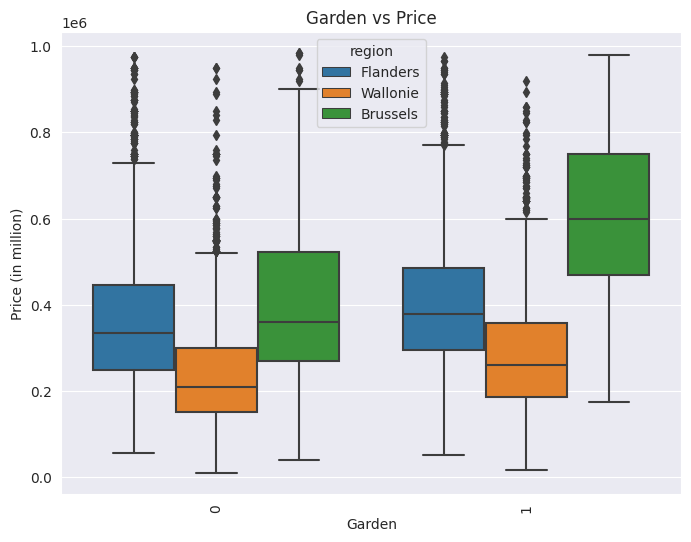

In [165]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'garden', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Garden vs Price')
plt.xlabel('Garden')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)


### 12. Garden Area

In [92]:
analyze_column(df, 'garden_area')

Analysis for column 'garden_area':
Number of NaN values: 0
Number of unique values: 809
Percentage of NaN values: 0.00%
Percentage of unique values: 5.21%
Unique values: [0.0000e+00 9.5000e+01 6.0000e+02 3.0000e+02 2.0000e+02 6.0000e+01
 3.8000e+02 1.0800e+02 8.0000e+01 1.0400e+02 3.7000e+01 1.7000e+02
 7.0000e+01 1.3800e+02 1.1000e+02 1.3000e+02 4.0000e+01 5.1000e+01
 2.6000e+02 3.2000e+01 1.0000e+00 3.0000e+01 5.0000e+02 5.4100e+02
 9.0000e+01 2.4400e+02 7.5000e+01 2.0000e+01 2.8000e+01 1.0000e+02
 5.2000e+01 1.1800e+02 2.2000e+01 1.1100e+02 1.6100e+02 2.3800e+02
 8.8000e+01 2.3300e+02 6.5000e+01 4.1000e+01 1.1600e+02 8.5000e+01
 4.4000e+01 8.9000e+01 5.8000e+01 5.3000e+02 2.2500e+02 9.0000e+02
 8.9500e+02 7.7800e+02 1.4000e+03 2.6190e+03 2.6500e+02 3.9000e+02
 2.3400e+02 1.9980e+03 3.6338e+04 8.0000e+02 4.1000e+02 2.4000e+02
 2.3000e+03 5.8600e+02 6.5800e+02 5.0000e+01 6.2000e+02 3.5900e+02
 3.5200e+02 2.8500e+02 7.9200e+02 7.0500e+02 1.0000e+03 7.7500e+02
 8.4200e+02 1.8000e+02 1.5

<Axes: xlabel='garden_area'>

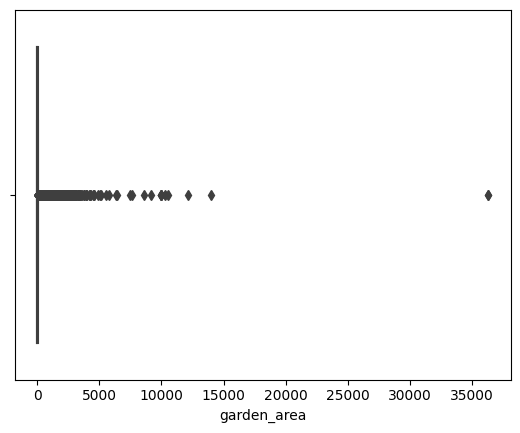

In [93]:
sns.boxplot(x=df['garden_area'])

<Axes: xlabel='garden_area'>

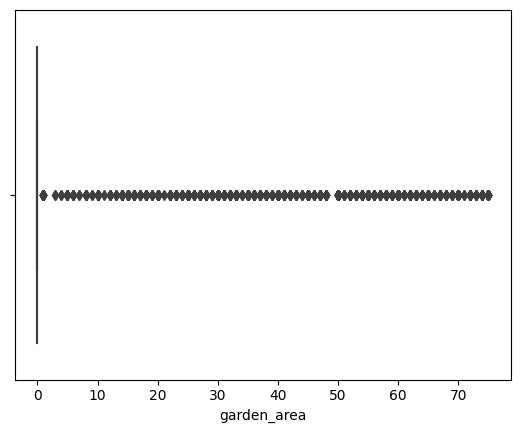

In [94]:
# Cannot get rid of the outlyers ! Leave as is
# This Garden Area is highly unbalanced!!
clean = remove_outliers_iqr(df,'garden_area')
sns.boxplot(x=clean['garden_area'])

### 13. Surface of the Land

In [95]:
analyze_column(df, 'surface_land')

Analysis for column 'surface_land':
Number of NaN values: 0
Number of unique values: 2013
Percentage of NaN values: 0.00%
Percentage of unique values: 12.97%
Unique values: ['1472' '461' '343' ... '3395' '1046' '3940']


In [96]:
df['surface_land'].replace('UNKNOWN', -1, inplace=True)

In [97]:
analyze_column(df, 'surface_land')

Analysis for column 'surface_land':
Number of NaN values: 0
Number of unique values: 2013
Percentage of NaN values: 0.00%
Percentage of unique values: 12.97%
Unique values: ['1472' '461' '343' ... '3395' '1046' '3940']


In [98]:
df['surface_land'] = df['surface_land'].astype(int)

In [99]:
df['surface_land']

0        1472
1         461
2         343
3         392
4         509
         ... 
17711     517
17712    1747
17713    1104
17714     402
17715       0
Name: surface_land, Length: 15525, dtype: int64

In [100]:
# change the '-1' (first to np.nan) to the mean_value of surface_land grouped by property_subtype
df['surface_land'].replace(-1, np.nan, inplace=True)
mean_surface_land = df.groupby('property_subtype')['surface_land'].transform('mean')
filled_surface_land = df.groupby('property_subtype')['surface_land'].fillna(mean_surface_land)
df['surface_land'] = filled_surface_land

<Axes: xlabel='surface_land'>

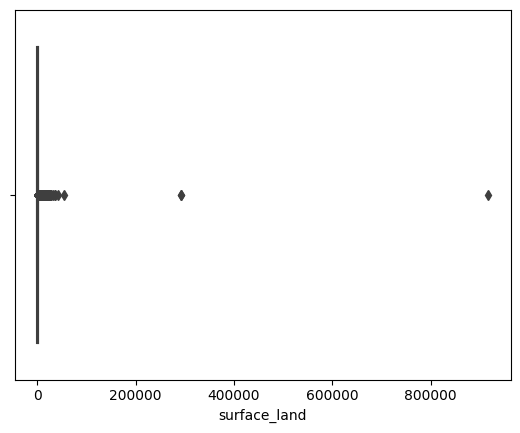

In [101]:
sns.boxplot(x=df['surface_land'])

<Axes: xlabel='surface_land'>

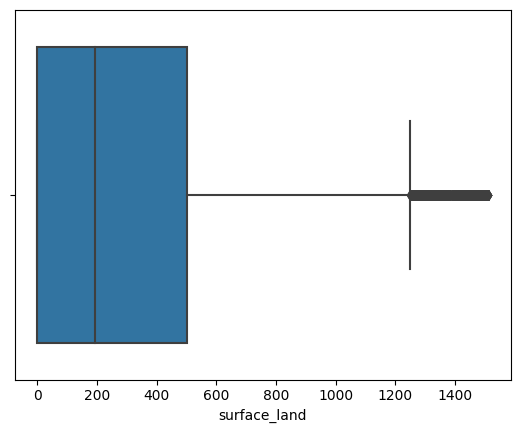

In [102]:
# Remove outlyers
df = remove_outliers_iqr(df, 'surface_land')
sns.boxplot(x=df['surface_land'])

/tmp/ipykernel_47655/654472208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['surface_land'])


<Axes: xlabel='surface_land', ylabel='Density'>

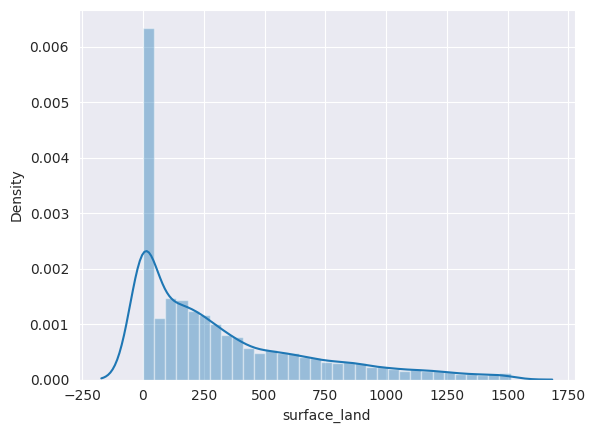

In [167]:
sns.distplot(df['surface_land'])

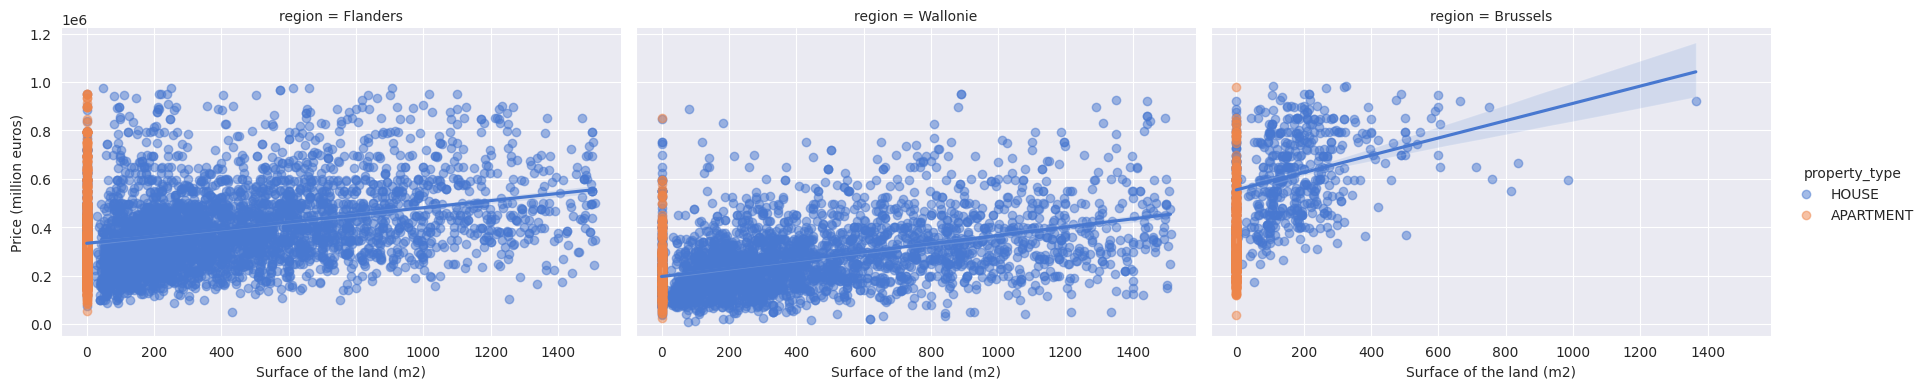

In [170]:
g = sns.FacetGrid(df, col="region", hue="property_type", height=4, aspect=1.5, palette='muted')
g.map(sns.regplot, "surface_land", "price", scatter_kws={"alpha": 0.5})
g.set_axis_labels("Surface of the land (m2)", "Price (million euros)")
g.add_legend()

### 14. Number of Facades

In [105]:
analyze_column(df, 'number_facades')

Analysis for column 'number_facades':
Number of NaN values: 0
Number of unique values: 9
Percentage of NaN values: 0.00%
Percentage of unique values: 0.06%
Unique values: ['4' '3' 0 '2' '1' 'UNKNOWN' '6' '14' '5']


In [106]:
df['number_facades'].replace('UNKNOWN', -1, inplace=True)

In [107]:
df[df['number_facades'].isnull()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude


In [108]:
df['number_facades'] = df['number_facades'].astype(int)

In [109]:
# check if any strings in the column
unique_values = df['number_facades'].unique()
string_values = [value for value in unique_values if isinstance(value, str)]

In [110]:
df['number_facades'].replace(-1, np.nan, inplace=True)

mean_facades = df.groupby('property_subtype')['number_facades'].transform('mean')
filled_facades = df.groupby('property_subtype')['number_facades'].fillna(round(mean_facades))
df['number_facades'] = filled_facades

In [111]:
df['number_facades'].unique()

array([ 4.,  3.,  0.,  2.,  1.,  6., 14.,  5.])

<Axes: xlabel='number_facades', ylabel='price'>

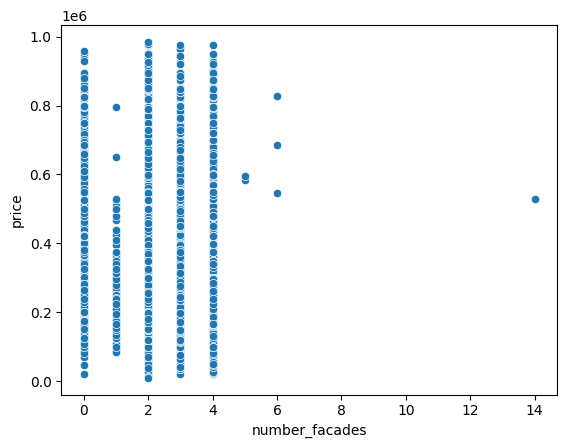

In [112]:
sns.scatterplot(df, x='number_facades', y='price')

<Axes: xlabel='number_facades'>

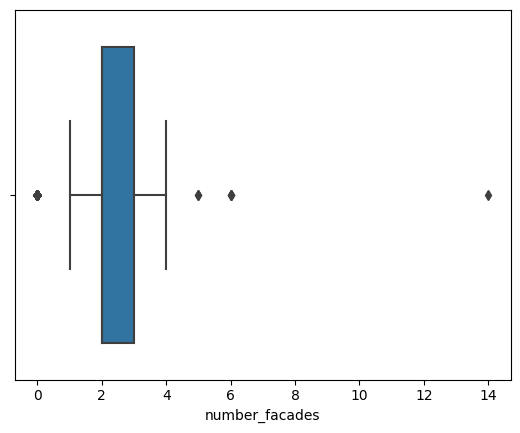

In [113]:
sns.boxplot(x=df['number_facades'])

<Axes: xlabel='number_facades'>

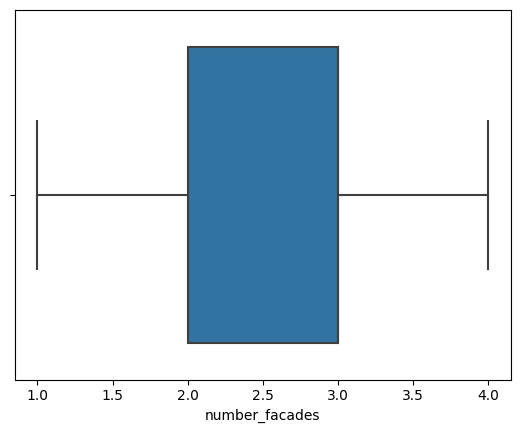

In [114]:
# Remove outlyers 
df = remove_outliers_iqr(df, 'number_facades')
sns.boxplot(x=df['number_facades'])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11479 entries, 0 to 17714
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          11479 non-null  object 
 1   property_type     11479 non-null  object 
 2   property_subtype  11479 non-null  object 
 3   price             11479 non-null  float64
 4   number_rooms      11479 non-null  float64
 5   living_area       11479 non-null  float64
 6   kitchen           11479 non-null  object 
 7   furnished         11479 non-null  int64  
 8   fireplace         11479 non-null  float64
 9   terrace           11479 non-null  int64  
 10  terrace_area      11479 non-null  float64
 11  garden            11479 non-null  int64  
 12  garden_area       11479 non-null  float64
 13  surface_land      11479 non-null  float64
 14  number_facades    11479 non-null  float64
 15  swimming_pool     11479 non-null  object 
 16  building_state    11479 non-null  object 
 17

### 15. Swimming Pool

In [116]:
analyze_column(df, 'swimming_pool')

Analysis for column 'swimming_pool':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.02%
Unique values: [0 1]


In [117]:
# change False and True to 0 and 1
df['swimming_pool'].replace(False, 0, inplace=True)
df['swimming_pool'].replace(True, 1, inplace=True)

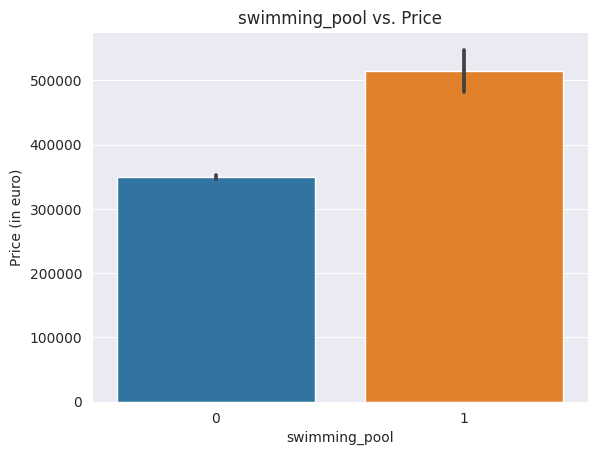

In [171]:
create_cat_plot(df, 'swimming_pool', 0)

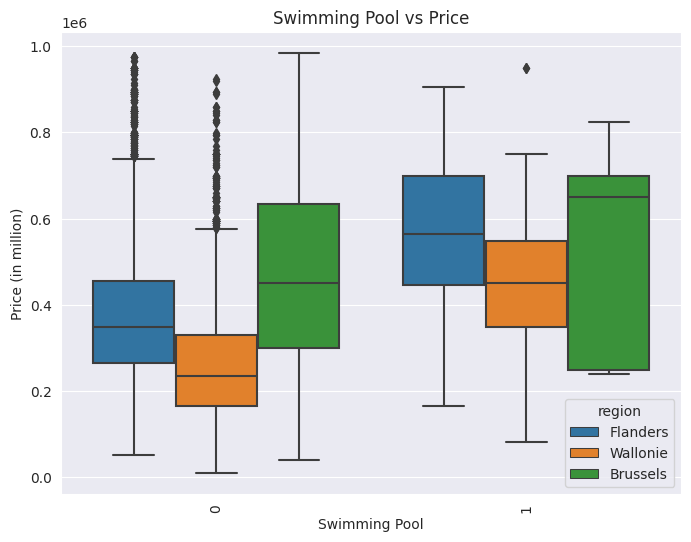

In [172]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'swimming_pool', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Swimming Pool vs Price')
plt.xlabel('Swimming Pool')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [119]:
df['swimming_pool'].unique()

array([0, 1])

### 16. Building State

In [120]:
analyze_column(df, 'building_state')

Analysis for column 'building_state':
Number of NaN values: 0
Number of unique values: 8
Percentage of NaN values: 0.00%
Percentage of unique values: 0.07%
Unique values: ['GOOD' 'AS_NEW' 'JUST_RENOVATED' 'TO_RENOVATE' 'TO_BE_DONE_UP' 0
 'TO_RESTORE' 'UNKNOWN']


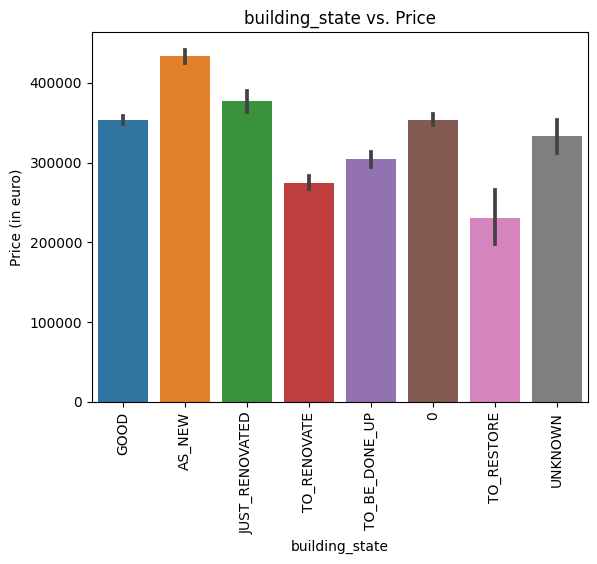

In [121]:
create_cat_plot(df, 'building_state', 90)

In [122]:
df[df['building_state'] == 'UNKNOWN']

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude
624,Liège,HOUSE,HOUSE,445000.0,6.0,300.0,NOT_INSTALLED,0,0.0,0,0.0,0,0.0,0.0,2.0,0,UNKNOWN,50.645094,5.573611
775,Seraing,HOUSE,HOUSE,159000.0,2.0,95.0,NOT_DEFINED,0,0.0,1,16.0,1,0.0,182.0,2.0,0,UNKNOWN,50.615238,5.508944
838,Seraing,APARTMENT,APARTMENT,210000.0,3.0,97.0,NOT_DEFINED,0,0.0,1,28.0,0,0.0,0.0,1.0,0,UNKNOWN,50.615238,5.508944
855,Seraing,HOUSE,HOUSE,245000.0,3.0,135.0,NOT_DEFINED,0,0.0,1,30.0,0,0.0,173.0,2.0,0,UNKNOWN,50.615238,5.508944
1153,Brugge,APARTMENT,APARTMENT,273900.0,2.0,97.0,NOT_DEFINED,0,0.0,1,0.0,0,0.0,0.0,1.0,0,UNKNOWN,51.208553,3.226772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17081,HAMPTEAU,HOUSE,HOUSE,349000.0,5.0,183.0,INSTALLED,0,0.0,0,0.0,1,0.0,1332.0,2.0,0,UNKNOWN,50.257904,5.472902
17344,Barvaux-sur-Ourthe,APARTMENT,DUPLEX,99000.0,2.0,94.0,INSTALLED,0,0.0,0,0.0,0,0.0,0.0,2.0,0,UNKNOWN,50.350609,5.493284
17345,Barvaux-sur-Ourthe,APARTMENT,APARTMENT,99000.0,2.0,80.0,INSTALLED,0,0.0,0,0.0,0,0.0,0.0,1.0,0,UNKNOWN,50.350609,5.493284
17447,MOUSTIER,HOUSE,HOUSE,280000.0,3.0,160.0,NOT_DEFINED,0,0.0,1,0.0,1,0.0,512.0,2.0,0,UNKNOWN,44.635923,0.301094


In [123]:
df['building_state'].replace(0, 'UNKNOWN', inplace=True)

In [124]:
df['building_state'].unique()

array(['GOOD', 'AS_NEW', 'JUST_RENOVATED', 'TO_RENOVATE', 'TO_BE_DONE_UP',
       'UNKNOWN', 'TO_RESTORE'], dtype=object)

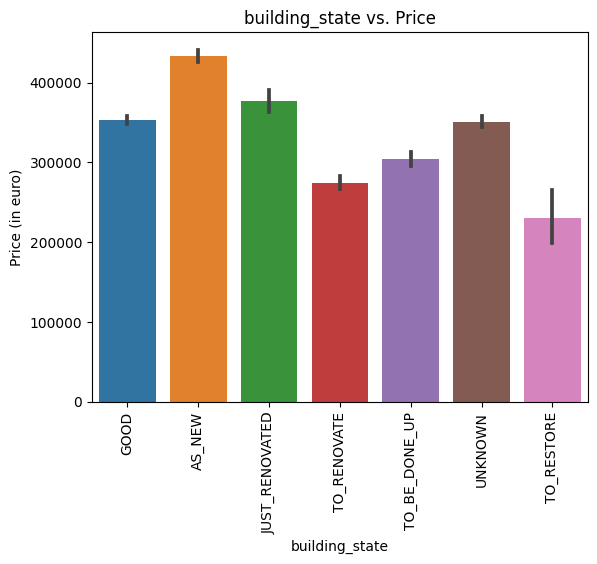

In [125]:
create_cat_plot(df, 'building_state', 90)

# 2. WRITING CLEANED DATA TO CSV

In [126]:
# Merge with dataframe that has all localities + regions
df_location = pd.read_csv('data/dataframe_locality.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_location = df_location[['locality','region','province']]
df_new = pd.merge(df, df_location, on='locality', how='left')
df_new.drop_duplicates(inplace=True)
df_new.reset_index(inplace=True, drop=True)

df = df_new

In [127]:
df[df['region'].isnull()]
# drop the null values
df.dropna(subset=['region'], inplace=True)

In [128]:
#write to csv
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.to_csv('data/cleaned.csv')

In [129]:
df

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,latitude,longitude,region,province
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,0,0.0,0,...,1,0.0,1472.0,4.0,0,GOOD,49.746322,3.073303,Flanders,Limburg
1,Ham,HOUSE,HOUSE,399500.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,461.0,3.0,0,AS_NEW,49.746322,3.073303,Flanders,Limburg
2,Ham,HOUSE,HOUSE,381000.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,343.0,3.0,0,AS_NEW,49.746322,3.073303,Flanders,Limburg
3,Ham,HOUSE,HOUSE,393500.0,3.0,192.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,392.0,3.0,0,AS_NEW,49.746322,3.073303,Flanders,Limburg
4,Ham,HOUSE,HOUSE,315000.0,3.0,197.0,NOT_INSTALLED,0,0.0,0,...,0,0.0,509.0,3.0,0,AS_NEW,49.746322,3.073303,Flanders,Limburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,Geraardsbergen Ophasselt,HOUSE,HOUSE,449000.0,3.0,168.0,HYPER_EQUIPPED,0,0.0,1,...,1,150.0,480.0,3.0,0,AS_NEW,50.821858,3.897035,Flanders,East Flanders
9979,Geraardsbergen Ophasselt,HOUSE,HOUSE,549000.0,3.0,180.0,HYPER_EQUIPPED,0,0.0,1,...,1,200.0,705.0,4.0,0,AS_NEW,50.821858,3.897035,Flanders,East Flanders
9980,Geraardsbergen Ophasselt,HOUSE,HOUSE,449000.0,3.0,168.0,HYPER_EQUIPPED,0,0.0,1,...,1,200.0,517.0,3.0,0,AS_NEW,50.821858,3.897035,Flanders,East Flanders
9981,Sint-Martens-Latem,HOUSE,HOUSE,599000.0,4.0,199.0,HYPER_EQUIPPED,0,0.0,1,...,0,0.0,1104.0,4.0,0,TO_RENOVATE,51.020971,3.639755,Flanders,East Flanders


# 3. VISUALISATION

## 3.1 Heatmap

In [130]:
# create heatmap of the houses and prices according to function written in DrawHeatMap
from utils.DrawHeatmap import drawheatmap, drawfullmap
drawheatmap()

#Execute this if you want the full items and details
# Note! Takes a while to load :)
# drawfullmap()

#### Heatmap conclusion
See the ''belgian_house_prices_heatmap.html' document that has been created in the root directory. Open up in browser.

Very expensive housing in Brussels Centre / Ixelles / Uccle and Knokke Heist
Other hotspots are around all the big cities (Gent / Antwerp / Charleroi / La Louvriere / Liege / Verviers)

## 3.2 Wordcloud - Amount of properties in Cities

In [131]:
from PIL import Image
from wordcloud import WordCloud

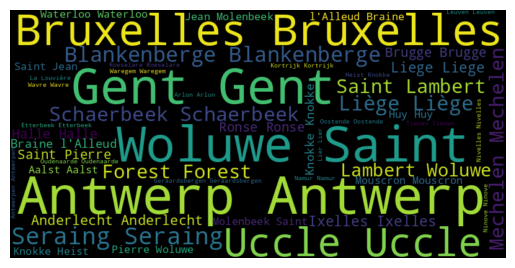

In [132]:
all_cities = ' '.join(df['locality'])
wordcloud = WordCloud(width=800, height=400, max_words=50).generate(all_cities)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Wordcloud Conclusion
Uccle / Gent / Anrwerp / Bruxelles / Woluwe Saint
All of these cities have a lot of properties for sale

## 3.2 Correlation

In [133]:
num_cols = ['price', 'number_rooms', 'living_area', 'furnished'	, 'fireplace',	'terrace','terrace_area',	'garden'	,'garden_area'	,'surface_land'	,'number_facades'	,'swimming_pool']

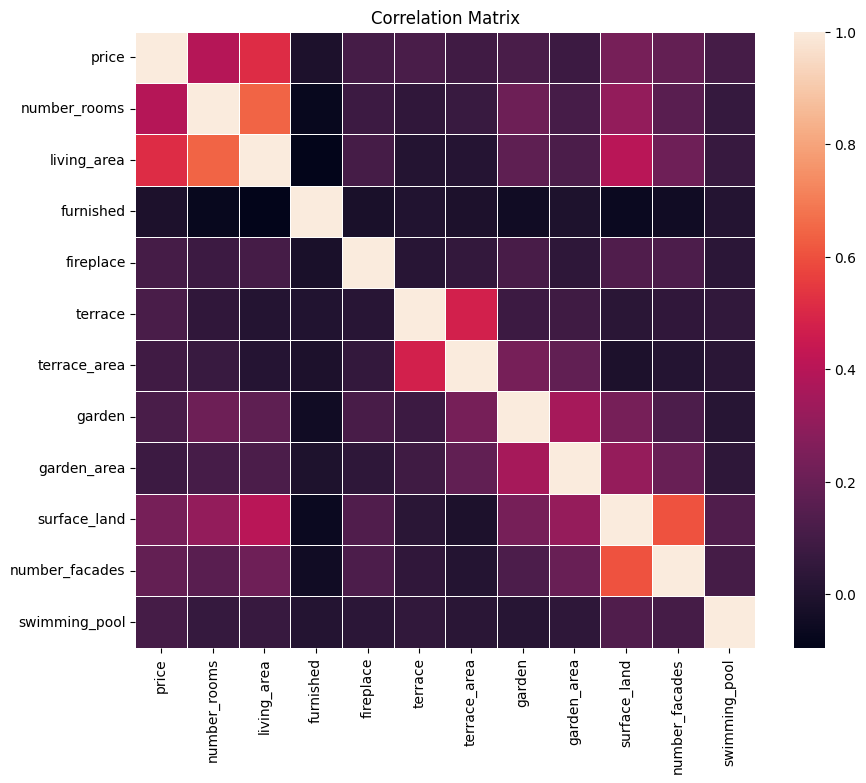

In [134]:
df_nums = df[num_cols]
correlation_matrix = df_nums.corr()

plt.figure(figsize=(10, 8))
sns.color_palette("vlag", as_cmap=True)
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Correlation conclusion:
the number of rooms and living area have a high correlation with the price. So the higher the price the (usually) more rooms / area of living.

### Take Aways

Correlations:
- price is highly overall correlated with living_area
- number_rooms is highly overall correlated with living_area
- living_area is highly overall correlated with price and number_rooms, surface_land
- terrace_area is highly overall correlated with terrace
- surface_land is highly overall correlated with living_area
- terrace is highly overall correlated with terrace_area

Text(0.5, 1.0, 'Price vs Living Area')

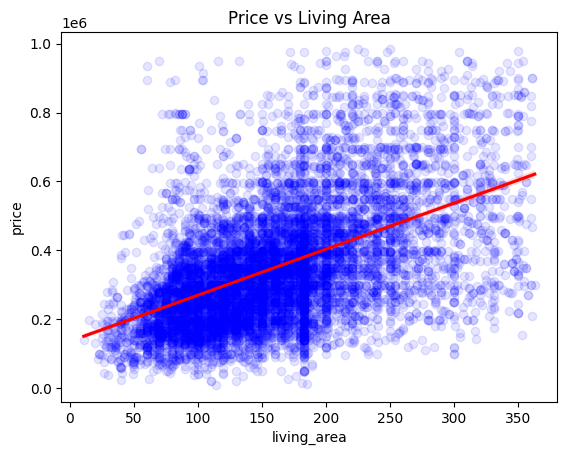

In [135]:
sns.regplot(df, x='living_area', y='price', scatter_kws = {"color": "blue", "alpha": 0.1},
            line_kws = {"color": "red"})
plt.title('Price vs Living Area')

Text(0.5, 1.0, 'Living Area vs Number of rooms')

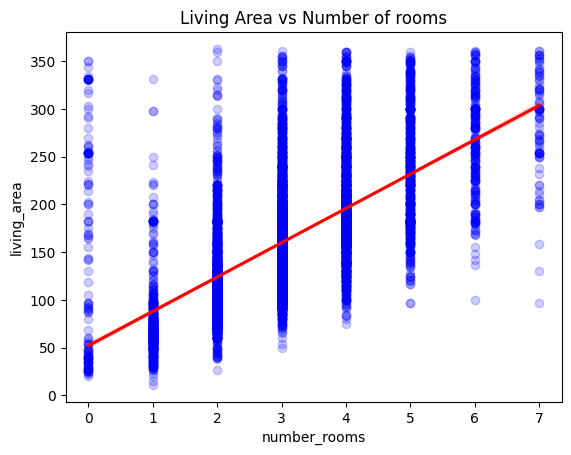

In [136]:
sns.regplot(df, x='number_rooms', y='living_area', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Living Area vs Number of rooms')

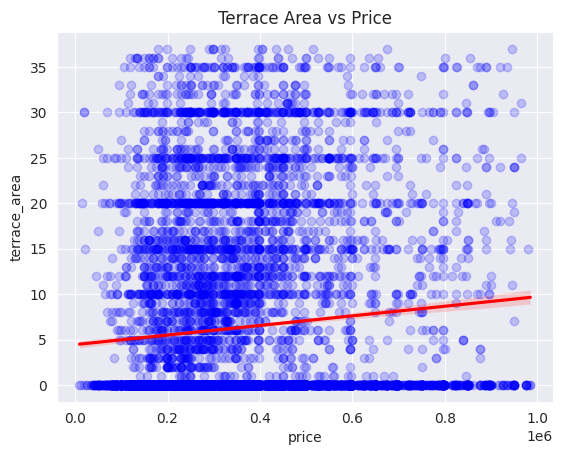

In [148]:
sns.regplot(df, x='price', y='terrace_area', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Terrace Area vs Price')
sns.set_style('darkgrid')

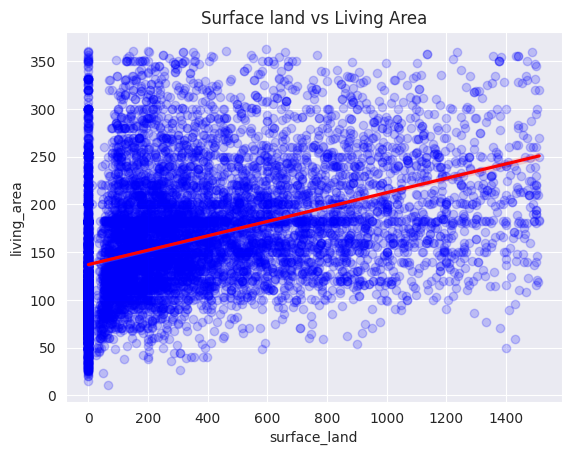

In [147]:
sns.regplot(df, x='surface_land', y='living_area', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Surface land vs Living Area')
sns.set_style('darkgrid')

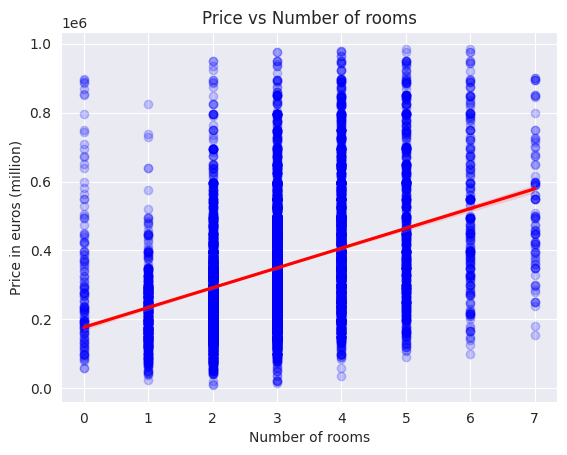

In [146]:

sns.regplot(df, x='number_rooms', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Number of rooms')
plt.ylabel('Price in euros (million)')
plt.xlabel('Number of rooms')
sns.set_style('darkgrid')

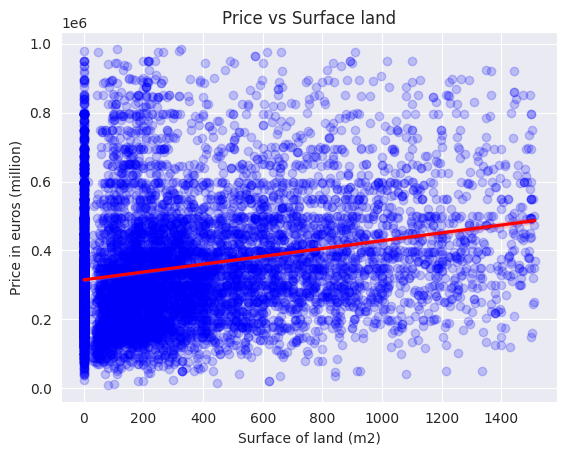

In [140]:
sns.regplot(df, x='surface_land', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Surface land')
plt.ylabel('Price in euros (million)')
plt.xlabel('Surface of land (m2)')
sns.set_style('darkgrid')

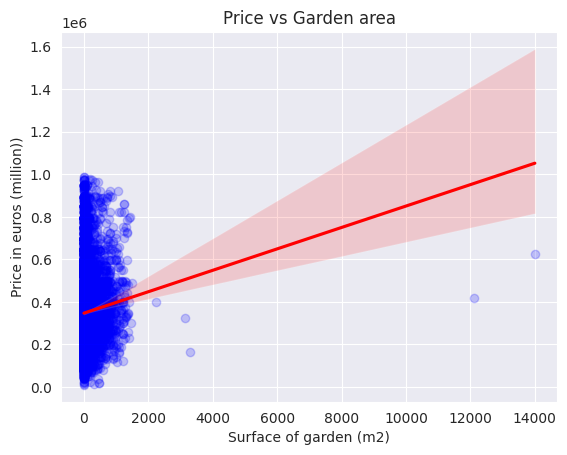

In [141]:
sns.regplot(df, x='garden_area', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Garden area')
plt.ylabel('Price in euros (million))')
plt.xlabel('Surface of garden (m2)')
sns.set_style('darkgrid')

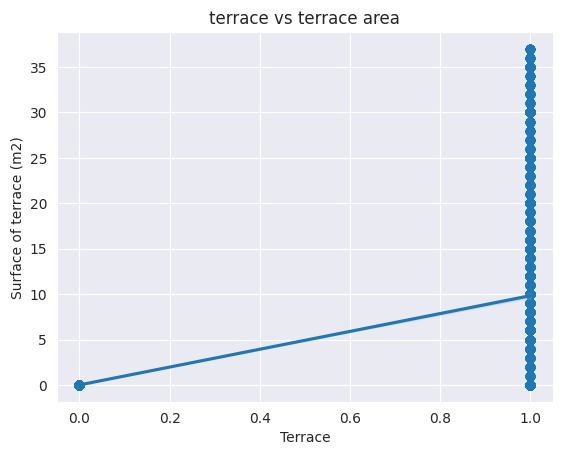

In [142]:
import seaborn as sns

sns.regplot(df, x='terrace', y='terrace_area')
plt.title('terrace vs terrace area')
plt.xlabel('Terrace')
plt.ylabel('Surface of terrace (m2)')
sns.set_style('darkgrid')